<a href="https://colab.research.google.com/github/abhishekdhasmana17/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Cardiovascular Risk Prediction
 


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - **Abhishek Dhasmana**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/abhishekdhasmana17/Cardiovascular-Risk-Prediction

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**

**Target variable** - *TenYearCHD* (10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”))

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
# From here onwards the libraries will be updated as requirement or may be included in the required code section.
import missingno as msn
from scipy.stats import *
import math

### Dataset Loading

In [2]:
# Load Dataset
# From the url in g drive
url = 'https://drive.google.com/file/d/1RYeRORB97avU6R8r8OaVr7KDygHZc-kd/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Importing dataset to create a dataframe
data = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
data.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,64,36,46,50,64
education,2.0,4.0,1.0,1.0,1.0
sex,F,M,F,M,F
is_smoking,YES,NO,YES,YES,YES
cigsPerDay,3.0,0.0,10.0,20.0,30.0
BPMeds,0.0,0.0,0.0,0.0,0.0
prevalentStroke,0,0,0,0,0
prevalentHyp,0,1,0,1,0
diabetes,0,0,0,0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
rows = len(data.axes[0])
columns = len(data.axes[1])

# Printing number of rows and columns 
print(f'Number of rows - {rows}')
print(f'Number of columns - {columns}')

Number of rows - 3390
Number of columns - 17


### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
pd.DataFrame([[col, data[col].duplicated().sum()] for col in data], columns = ['Column Name', 'Duplicate count'])

,Column Name,Duplicate count
0,id,0
1,age,3351
2,education,3385
3,sex,3388
4,is_smoking,3388
5,cigsPerDay,3357
6,BPMeds,3387
7,prevalentStroke,3388
8,prevalentHyp,3388
9,diabetes,3388


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
pd.DataFrame([[col, data[col].isnull().sum()] for col in data], columns = ['Column Name', 'Missing value Count'])

,Column Name,Missing value Count
0,id,0
1,age,0
2,education,87
3,sex,0
4,is_smoking,0
5,cigsPerDay,22
6,BPMeds,44
7,prevalentStroke,0
8,prevalentHyp,0
9,diabetes,0


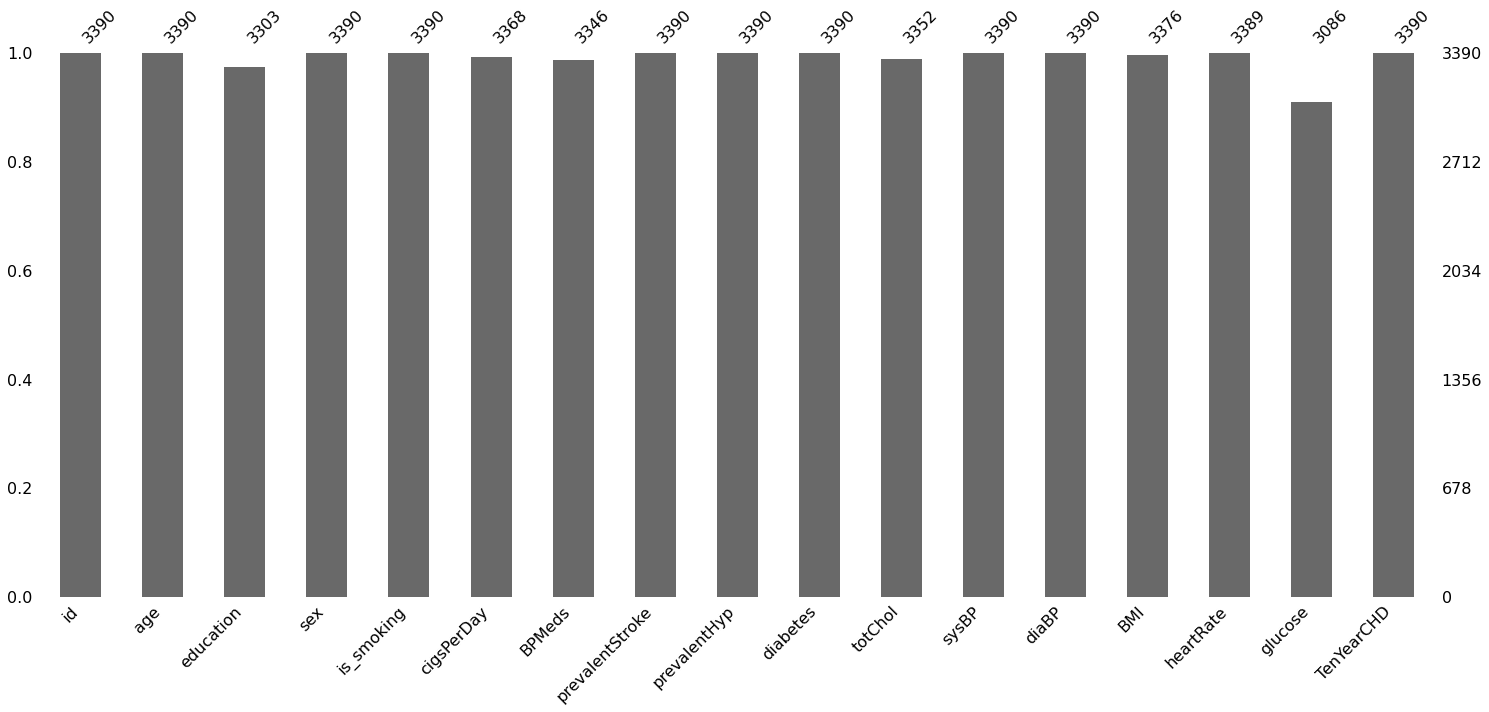

In [8]:
# Visualizing the missing values
msn.bar(data)

### What did you know about your dataset?

Cardiovascular risk indicates to the chances of developing heart disease or stroke, often due to variables(features) given in dataset.

These variables can damage the blood vessels and increase the risk of plaque buildup, which can lead to blockages in the heart and increase the risk of heart attack or stroke.

Our goal which is mentioned on the problem statement made clear that prediction of the potential patient is neccessary in order top minimize the risk.

After importing dataset we can across various factors which can lead us to identify and the classify those potential patients.

But due to the presence of null value our predition might not be accurate inorder to increase the accuracy of our models null values and outliers must be well treated (will be done in later part of this project).

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Dataset provided mentioned we have demographical, behavioral and medical risk factors(features) and after investigating the dataset, insights found that - 

Demographic:
1. Sex: male or female("M" or "F")
2. Age: Age of the patient.

Behavioral:
1. is_smoking: whether or not the patient is a current smoker ("YES" or "NO").
2. CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

Medical(history):
1. BPMeds: whether or not the patient was on blood pressure medication.
2. Prevalent Stroke: whether or not the patient had previously had a stroke.
3. Prevalent Hyp: whether or not the patient was hypertensive.
4. Diabetes: whether or not the patient had diabetes.

Medical(current):
1. Tot Chol: total cholesterol level.
2. Sys BP: systolic blood pressure.
3. Dia BP: diastolic blood pressure.
4. BMI: Body Mass Index.
5. Heart Rate: heart rate.
6. Glucose: glucose level.

Target feature(class of risk):
1. TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)

This dataset contains combination of nominal and ordinal type features. As a Data Scientist this prediction will be very interesting to perform prediction, because it will also help me to understand at what circumstances the risk is changing or evolving.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
pd.DataFrame([[col, data[col].unique()] for col in data], columns = ['Column Name', 'Unique values'])

,Column Name,Unique values
0,id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,age,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
2,education,"[2.0, 4.0, 1.0, 3.0, nan]"
3,sex,"[F, M]"
4,is_smoking,"[YES, NO]"
5,cigsPerDay,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
6,BPMeds,"[0.0, nan, 1.0]"
7,prevalentStroke,"[0, 1]"
8,prevalentHyp,"[0, 1]"
9,diabetes,"[0, 1]"


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Droping id feature because it is not that important for the analysis.
data.drop(columns = ['id'], inplace = True)

In [13]:
data.head(1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1


In [14]:
# Saparating numerical type features for future requirement.
num_feat = [col for col in data.columns if data[col].nunique()>=4]
print(num_feat)

['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Now converting features that has string type values i.e. sex and is_smoking

In [15]:
# Checking for value count of string type values
for col in ['sex', 'is_smoking']:
  print(data[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [16]:
# Encoding data of above features
encode = {'sex' : {'F' : 0, 'M' : 1 }, 'is_smoking' : {'YES' : 1, 'NO' : 0}}

In [17]:
# Replacing values in features

data = data.replace(encode)

In [18]:
data.head().T

,0,1,2,3,4
age,64.0,36.00,46.00,50.00,64.00
education,2.0,4.00,1.00,1.00,1.00
sex,0.0,1.00,0.00,1.00,0.00
is_smoking,1.0,0.00,1.00,1.00,1.00
cigsPerDay,3.0,0.00,10.00,20.00,30.00
BPMeds,0.0,0.00,0.00,0.00,0.00
prevalentStroke,0.0,0.00,0.00,0.00,0.00
prevalentHyp,0.0,1.00,0.00,1.00,0.00
diabetes,0.0,0.00,0.00,0.00,0.00
totChol,221.0,212.00,250.00,233.00,241.00


### What all manipulations have you done and insights you found?

Manipulation was not that much required. I just dropped the id feature so that unecessary feature would be not present at the time of model preparation.

Also, I made an array of columns that contains numerical type data through **unique() method**, so that in case of needed num type features we can put **num_feat** into use.

Further,  I have converted the the values of sex and is_smoking from YES,NO,F and M to 0(s) and 1(s). So that we can use them for prrediction.

Since the dataset is already clear at the variable section I will proceed to the Exploratory Data Analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 | Univariate Analysis | Histplot of numeric type variable 

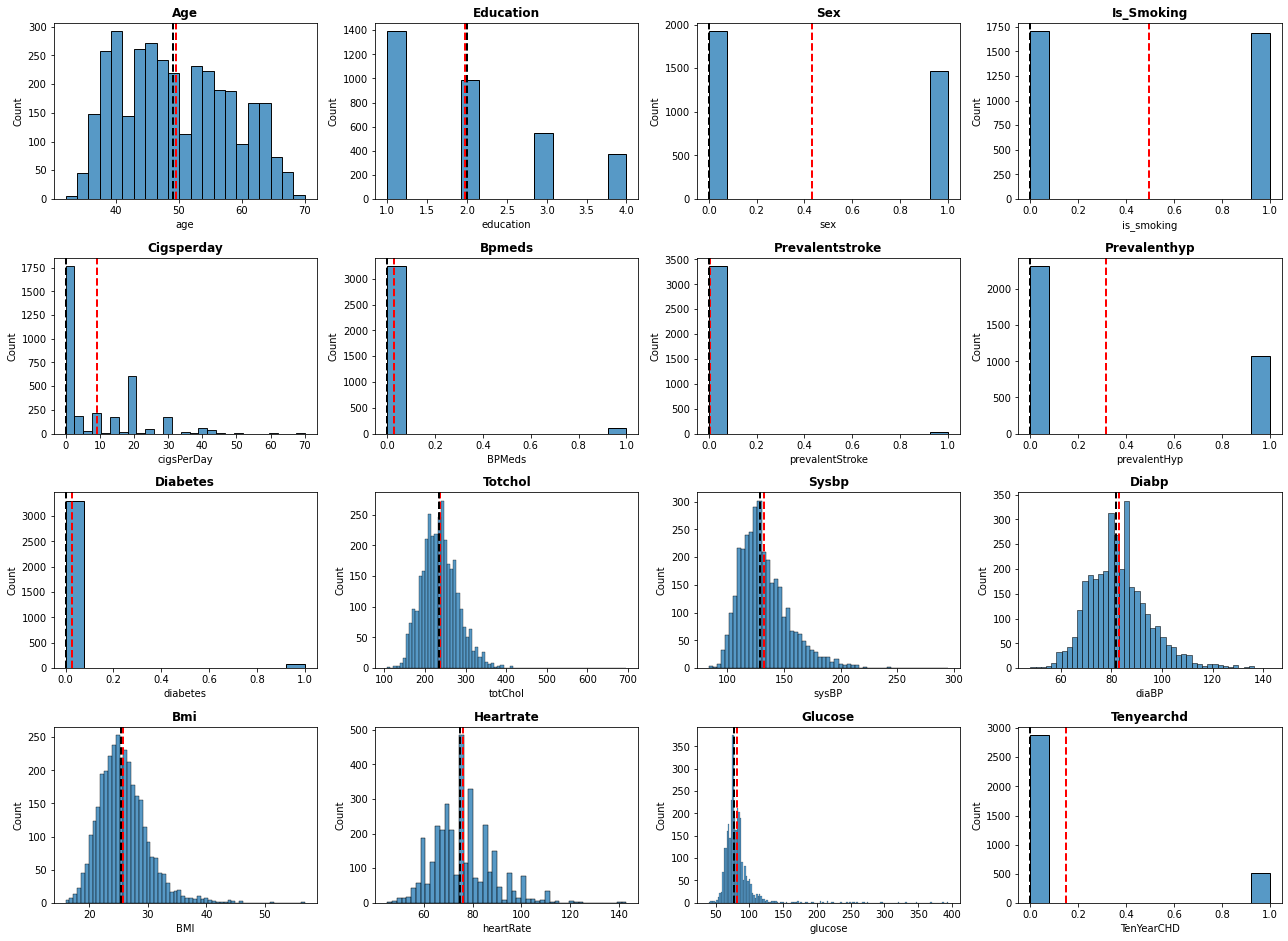

In [19]:
# Chart - 1 visualization code
plt.figure(figsize=(18,16))
for n,column in enumerate(data.columns):
  feature = data[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

In order to check for the distribution of features, I used histplot for quick understanding of the distribution.

##### 2. What is/are the insight(s) found from the chart?

I have found that, featrues like Education, Sex, is_smoking, Bpmeds, Prevalentstroke, Prevalenthyp, Diabetes, TenyearCHD is categorial type dataset and rest is continuous type.

Also, Presence of outliers can be traced from the plot.

Dataset seem to follow Normal distribution with small amount of skewness. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The impact on business is not defined from above plot as the plot only shows the medical record of the patient.

It only tells us the nature of records as a whole which is completely unrelated to the business impact.

#### Chart - 2 Histplot of Diabetes with respect to age

In [20]:
# Chart - 2 visualization code
df1 = pd.DataFrame(data[['diabetes', 'age']])

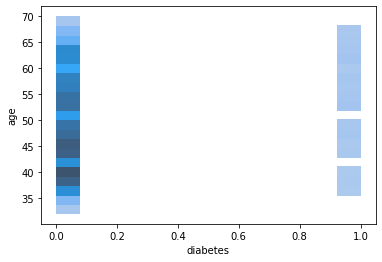

In [21]:
sns.histplot(y='age', x = 'diabetes', data = df1)
plt.show()

##### 1. Why did you pick the specific chart?

As I said before histplot is useful for checking the distribution we can draw conclusions.

##### 2. What is/are the insight(s) found from the chart?

We can here see that most of the people does not have diabetes. Age group of 50-75 have the higher number of diabetic patient.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by knowing the age group of most of the diabetic people we can increase the supply of drugs for that particular age group for better results and recovery.

#### Chart - 3 | Potential risk of age group

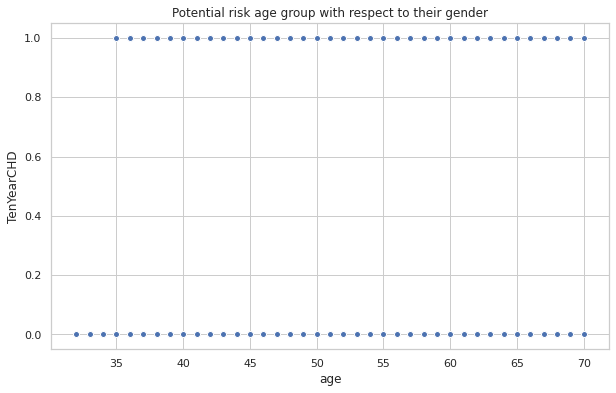

In [22]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
plt.title('Potential risk age group with respect to their gender')

sns.scatterplot(x="age", y="TenYearCHD", palette="ch:r=-.2,d=.3_r",sizes=(1, 8), linewidth=1, data=data)

##### 1. Why did you pick the specific chart?

I used Scatter plot in order to find the outlier in the relation between age and TenYearCHD.  



##### 2. What is/are the insight(s) found from the chart?

Here we found that patient who is at risk of CHD doesn't affected by the age, it just depend upon the factors that were given in the dataset.

there is no presence on outliers in this relationship.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

I would say not defined. If there will be any update regarding the business , i will update here.

#### Chart - 4 | Countplot of TenYearCHD

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


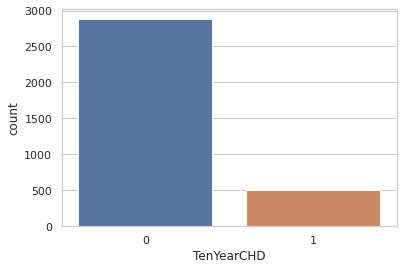

In [23]:
# Chart - 4 visualization code
sns.countplot(data['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Countplot prevides the simplest yet effective visualization for a dataset of small number of variables.

##### 2. What is/are the insight(s) found from the chart?

We can see here that out of the whole dataset, those patient that have potential to suffer through CHD is very low in numbers (approx. 500). While the number of those who will not suffer is high (approx. 2800).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It could lead to negative business impact because of the small number of potential patien who are at risk of CHD. Since, the number is small the business will try cost cutting for that particular risk and try to increase fund for other diseases. 

#### Chart - 5 | Gender wise Count plot of records

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


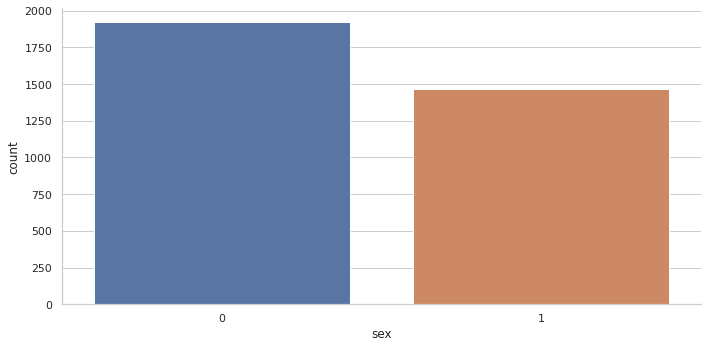

In [24]:
# Chart - 5 visualization code
sns.factorplot('sex', data = data, kind = 'count', aspect = 2.0)

In [25]:
p1 = data['sex'].value_counts(normalize=True) * 100

In [26]:
p1

0    56.725664
1    43.274336
Name: sex, dtype: float64

##### 1. Why did you pick the specific chart?

I choose this plot to simply compare the count of gender of patients.

##### 2. What is/are the insight(s) found from the chart?

It came under our knowledge that most of the patients who have potential for CHD are FEMALE(56.72%). 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

I would not say positive or negative impact but considering that most of the patients are female, the hospital management should arrange the necessary needs for a women keeping their menstruation cycle in mind.

#### Chart - 6 | Regression plot of age vs is_smoking and cigsPerDay

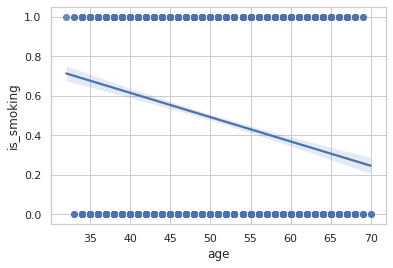

In [27]:
# Chart - 6 visualization code
sns.regplot(data = data, x = 'age', y = 'is_smoking')

In [28]:
p2 = data['is_smoking'].value_counts(normalize=True) * 100
p2

0    50.235988
1    49.764012
Name: is_smoking, dtype: float64

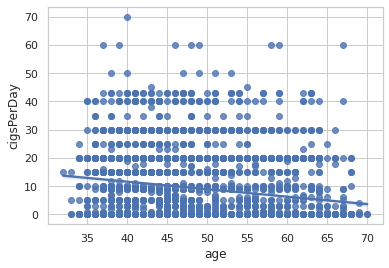

In [29]:
sns.regplot(data = data, x = 'age', y = 'cigsPerDay')

In [30]:
p3 = data['cigsPerDay'].value_counts(normalize=True) * 100
p3

0.0     50.564133
20.0    17.992874
30.0     5.225653
15.0     5.106888
10.0     3.147268
9.0      3.087886
5.0      3.058195
3.0      2.345606
40.0     1.840855
1.0      1.425178
25.0     1.306413
43.0     1.247031
35.0     0.504751
2.0      0.504751
6.0      0.415677
8.0      0.296912
7.0      0.237530
60.0     0.237530
18.0     0.207838
4.0      0.207838
50.0     0.178147
17.0     0.148456
23.0     0.148456
11.0     0.118765
12.0     0.089074
13.0     0.089074
19.0     0.059382
16.0     0.059382
45.0     0.059382
14.0     0.029691
70.0     0.029691
38.0     0.029691
Name: cigsPerDay, dtype: float64

##### 1. Why did you pick the specific chart?

In order to check the relationship between two continuous variable(in graph1 and graph2), I have used regression plot. 

##### 2. What is/are the insight(s) found from the chart?

From grah 1, we can say that the slope of trending line is negative that means with the increase in age we can see that patients are non smoker. Also, we can state the otherwise, that is young patient are smoking cigarettes.

From graph 2, we can see the trend between cigarette smoked per day with the age. The trend line does not seems to change, Although 50.56% of the total patients does not smoke but rest of them are smoking and a huge percentage of the rest of the patients are smoking 20 cigarettes per day. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We found that most of the heavy smokers are from young age, there is no safe limit of smoking cigarettes so considering that 20% are consuming 20cigs per day we can establish an intoxication centre or a camp in order to help heavy smokers.

#### Chart - 7 | Countplot of Education level with refrence to gender

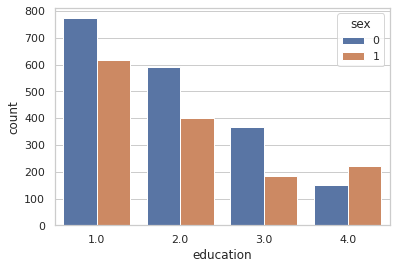

In [31]:
# Chart - 7 visualization code
sns.countplot(x = 'education', data = data, hue = 'sex')

##### 1. Why did you pick the specific chart?

Again the count plot is easy to understand the comparative study, thats why i used this plot.

##### 2. What is/are the insight(s) found from the chart?

 From the data we gott four level of education. Not knowing what these level indicates, from above graph we can say that from education level 1 to 3 the perrcentage of men is higher but in level four percentage of women is high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Education does not have a direct relationship with the disease CHD, disease totally depend upon the one's lifestyles. So i do not have any comment on this.

#### Chart - 8 | Potential of gender to be at risk of CHD

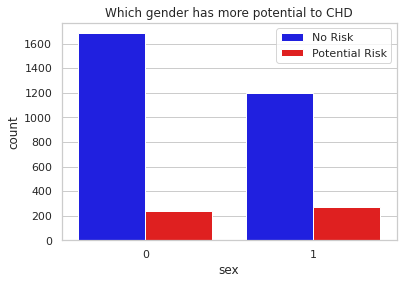

In [32]:
# Chart - 8 visualization code
my_palette = {0 : 'Blue' , 1 : 'red'}
sns.countplot(x = data['sex'], hue = data['TenYearCHD'], palette = my_palette)
plt.title("Which gender has more potential to CHD")
plt.legend(['No Risk','Potential Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Most of the data set contains numeric values that is why I priorities the count plot.

##### 2. What is/are the insight(s) found from the chart?

We already knew that those who have risk to develope CHD are low in number, from the graph we found that Most of the males and females are safe from CHD but a small fraction of women is in more danger than male to develope CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

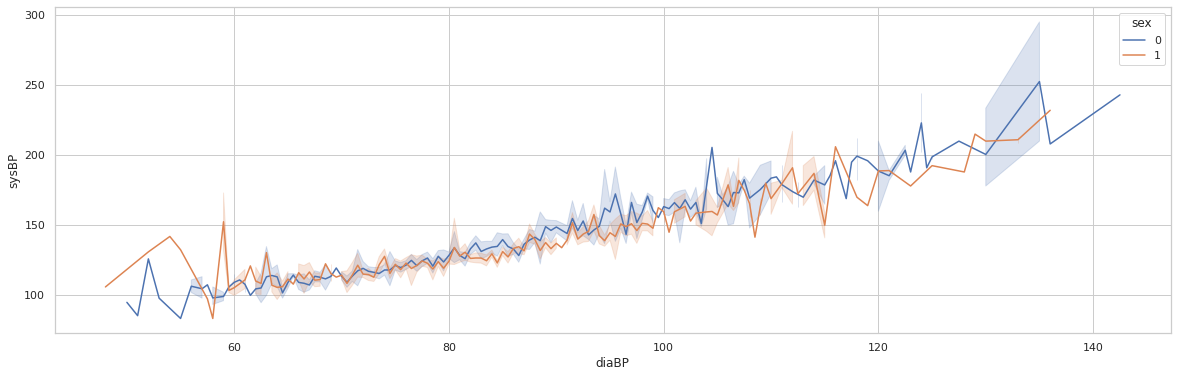

In [33]:
# Chart - 9 visualization code
plt.figure(figsize = (20,6))
sns.lineplot(data = data, x = 'diaBP', y = 'sysBP', hue = 'sex')


##### 1. Why did you pick the specific chart?

I used lineplot to see the relation between Blood Pressure (sys and dia).

##### 2. What is/are the insight(s) found from the chart?

I found that the average blood pressure in both male and female is high, which in genera is not a good sign.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the average blood pressure is high it is difficult to deal with any of the emergency a patient can have. As a hospital management member i would suggest to take care of the blood pressure which an cause a business to pay more attention towards these issues.

#### Chart - 10 | Plot between Age and Total cholestrol

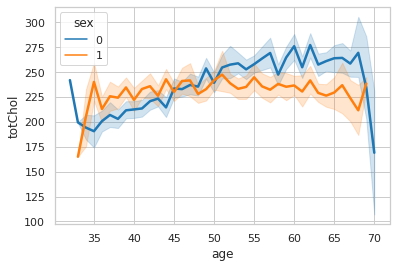

In [34]:
# Chart - 10 visualization code
sns.lineplot(x='age', y = 'totChol',hue = 'sex', data = data, palette="tab10", linewidth=2.5)
plt.show()

##### 1. Why did you pick the specific chart?

To track the total cholestrol of male and female i used line plot

##### 2. What is/are the insight(s) found from the chart?

It is known that normally cholestrol must stay under 200 mg/dl. 

From above graph i can conclude that on average the cholestrol of both male and female is high. But in case of male the cholestrol is slightly higher as compared to female.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no impact on business but since patient need to treat the cholestrol he or she needs medical assitance which can help hospital make profit.

#### Chart - 11 | BMI vs CHD

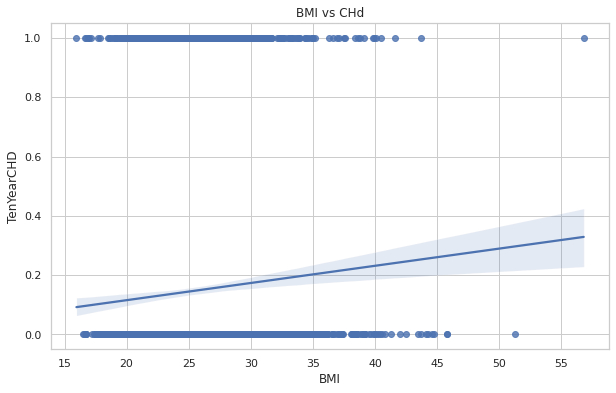

In [35]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
plt.title('BMI vs CHd')

sns.regplot(x="BMI", y="TenYearCHD",  data=data)

##### 1. Why did you pick the specific chart?

To check the relatioship between BMI and CHD

##### 2. What is/are the insight(s) found from the chart?

We know that the healthy range of BMI lies within 18 to 25, but here i found that healthy patient are only a fraction of total patients.

Most of the patients have high BMI thhat means they lie under obease category whih is not a good sign,

also in above graph we saw that most of the people have high chlestrol level that also supports this graph.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

it help in creating positive impact as two reports that is in chart 10 and 11 are indicating the same thing, it makes hospital reliable and helps in business growth.

#### Chart - 12 | Plot on heart stroke with age

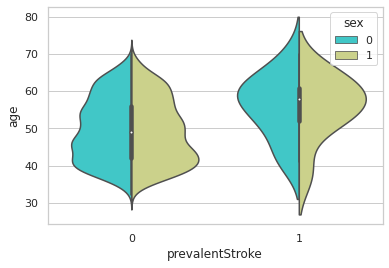

In [36]:
# Chart - 12 visualization code
sns.violinplot(x='prevalentStroke',y="age",data=data, hue='sex', split='True', palette='rainbow')

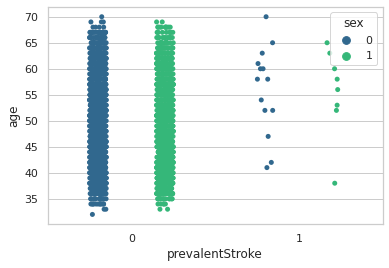

In [37]:
sns.stripplot(x='prevalentStroke', y='age', data=data, jitter=True, hue='sex', dodge=True, palette='viridis')

##### 1. Why did you pick the specific chart?

I used two charts here first is violin plot(to see the distribution) and second is strip plot(to see the variation) to visualize the same features that is prevalennt stroke vs age, because these plots are easy to understand data  for small number of values in features(here 0 and 1).

##### 2. What is/are the insight(s) found from the chart?

From first chart we can see the distribution of prevalent stroke with respect to age.

From second chart it is made clear that most of the prevalent strokes were shown by patients abbove age 45 and most of those patients are females.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Considering the medical history of a patients can be expensive yet the results will be in favor of patients. Prevalent strokke is one of the major factor that decides whether a patient is ready to undergo heavy medication or not. 

So, knowing medical history always proven beneficial for a business growth.

#### Chart - 13 | Hypertension / BP meds Vs Age

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


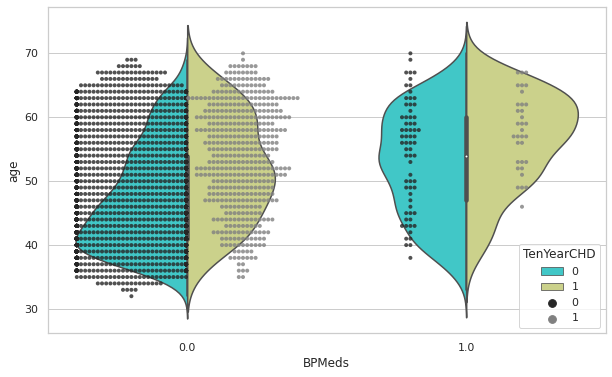

In [38]:
# Chart - 13 visualization code
plt.figure(figsize=(10,6))
sns.violinplot(x='prevalentHyp',y="age", data=data, hue='TenYearCHD', split='True', palette='rainbow')
sns.swarmplot(x='BPMeds',y="age", data=data, hue='TenYearCHD', dodge='True', color='grey', alpha=.8, s=4)

##### 1. Why did you pick the specific chart?

Again, I used violin plot to see the distribution of prevalent hypertension and then i used strip plot plot to check the variation of BPmeds with respect to age.


##### 2. What is/are the insight(s) found from the chart?

From the merged chart we can clearly see that the number of patients that do not have prevalent hyperrtension are large in number.

Those who suffered from hypertension are taking BPmeds.

Number of males are more who suffered from hypertension than fenale. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As discussed one chart above, Considering the medical history of a patients can be expensive yet the results will be in favor of patients. Prevalent hypertionsion is also one of the major factor that decides whether a patient is ready to undergo heavy medication or not.

So, knowing medical history always proven beneficial for a business growth.

#### Chart - 14 - Correlation Heatmap

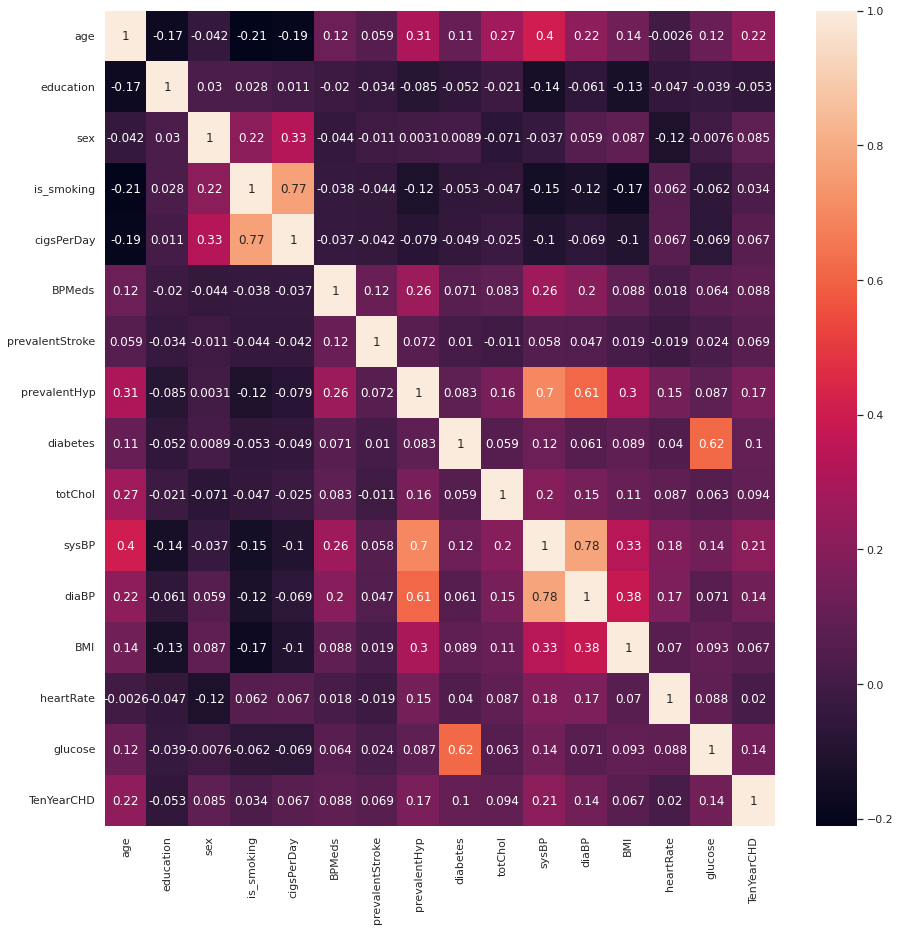

In [39]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = data.corr()
sns.heatmap((correlation), annot=True)

##### 1. Why did you pick the specific chart?

 Heatmaps are a useful tool for displaying data in a compact and easily understandable format, and they can be used to show trends and patterns in data sets.
 

##### 2. What is/are the insight(s) found from the chart?

Following insights are found - 

1. cigs per day is highly correlated with is_smoking(because of the obvious reasons that if a person smoke he or she may tend to smoke more than one cigarette and it was visualized above).
2. BPmeds is also having small but positive correlation with diaBP, sysBP, prevalanthyp (reason being, patientss who are sufferenig from blood pressure related diseases are taking meds but since the correlation is small positive we can conclude that not all patients are taking meds).
3. Prevalenthyp is highly correlated with sysBP and diaBP (due to the fact that hypertension is caused by variation in blood pressure and diaBP and sysBP ar two variables that define Bloop Pressure).
4. A strong positive correlation has been identified betweendiabetes and glucose. This means that as the values of diabetes increase, the values of glucose also tend to increase, and vice versa. The correlation coefficient between the two variables is high, indicating a strong linear relationship between the two.
5. Most of the variables that define a patient's medical health are positively correlated that describes that when predicting for CHD, we must keep all of these features in mind.
6. Our target variable TenYearCHD is positively correlated with each and every features except for education.

#### Chart - 15 - Pair Plot 

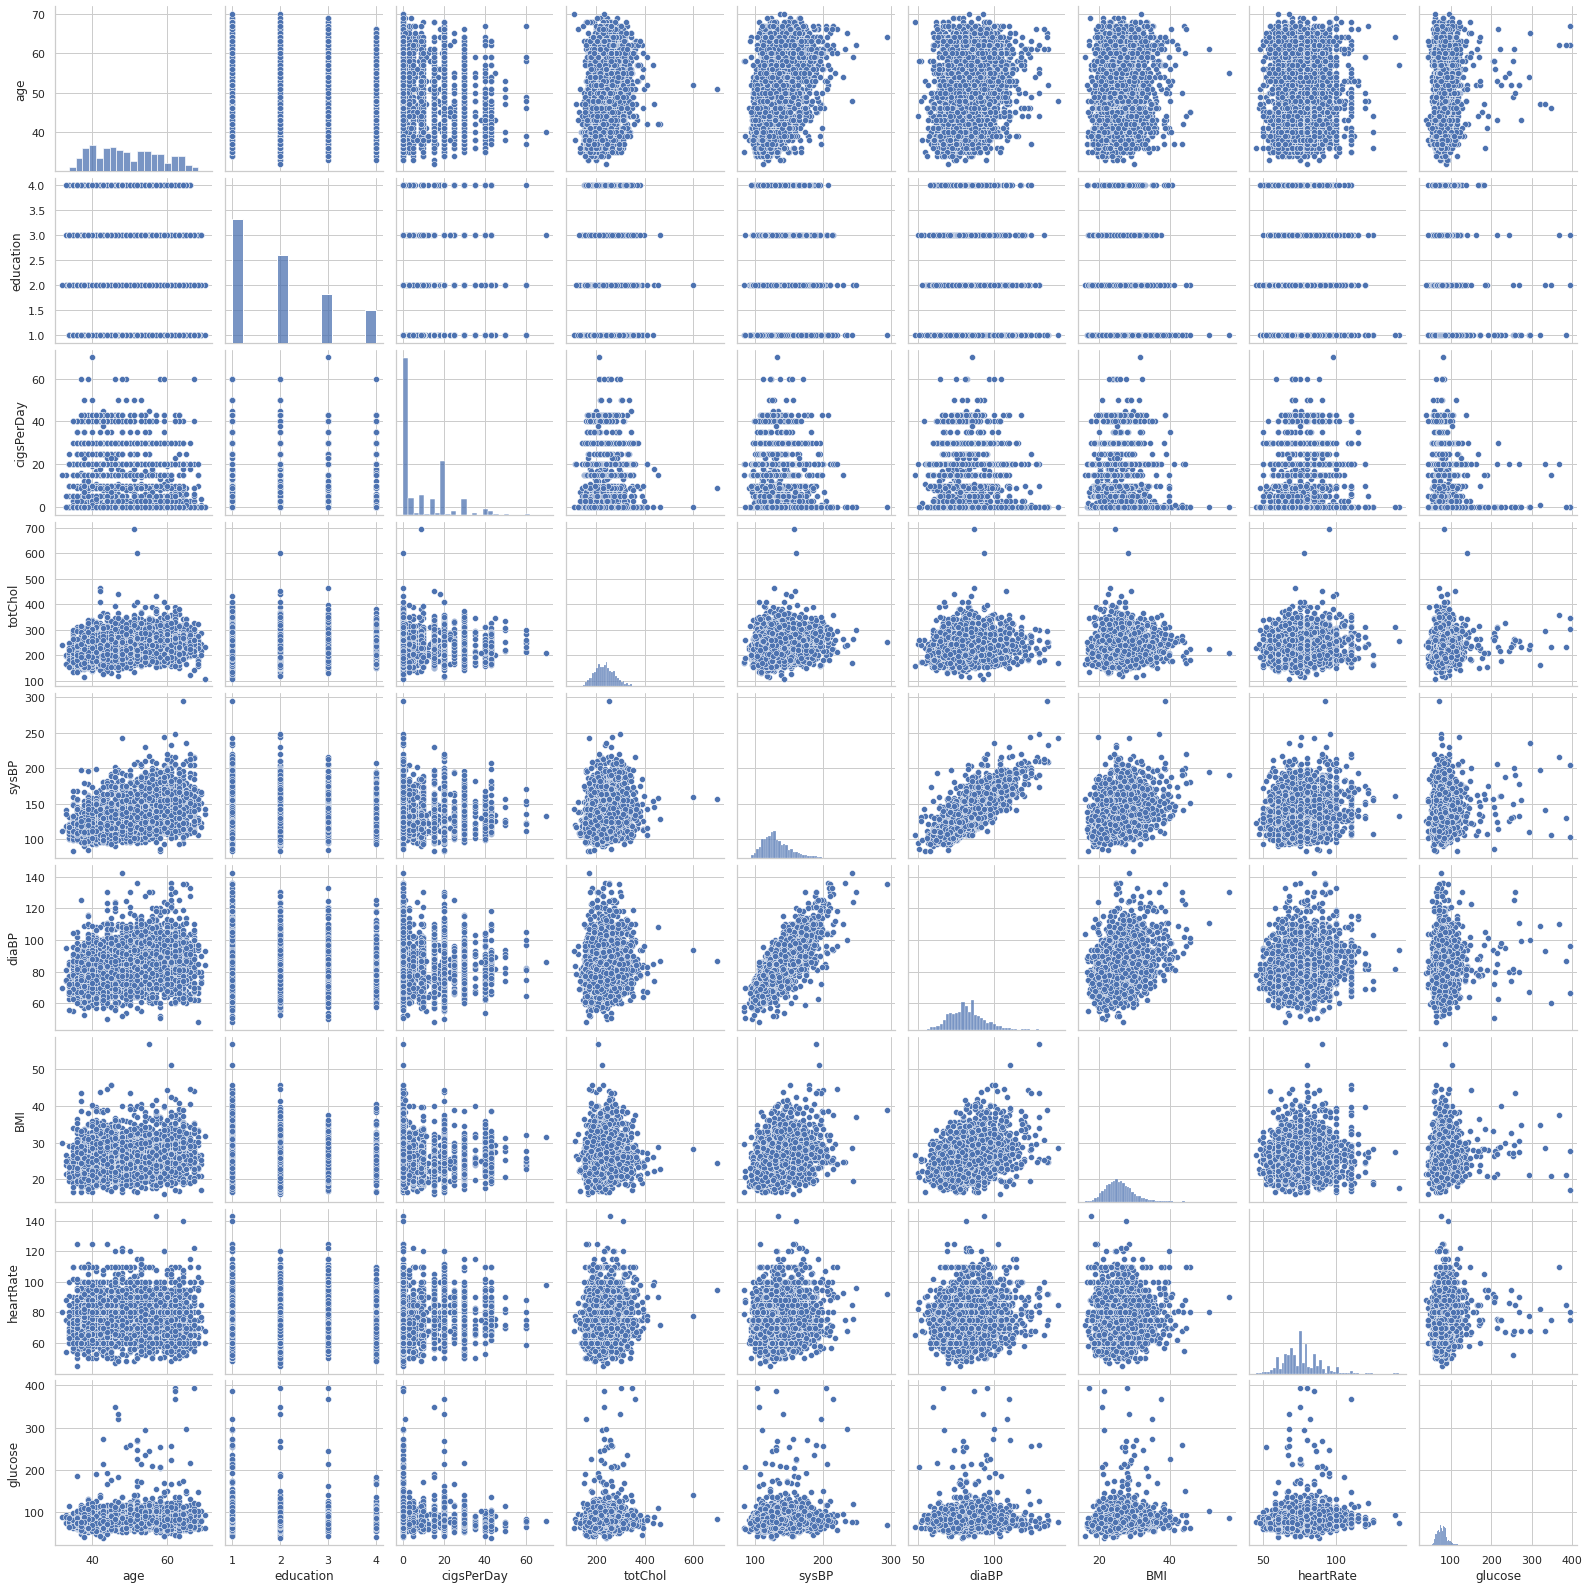

In [40]:
# Pair Plot visualization code
sns.pairplot(data[num_feat])

##### 1. Why did you pick the specific chart?

Scatter matrix plot is used to descibe tthe prelationship between variable. 

Since we can define the relation between all the numeric variables i used this plot.

##### 2. What is/are the insight(s) found from the chart?

We can see that - 
1. sysBP is linearly changing with diaBP
2. Presence of outlier is detected which we will take care of in later part of this project.
3. most of the variables show clustering of 1.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Patients who are at more risk of TenYearCHD is above 50 years of age.
2. 
3.  

In [41]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1 | Patients who are at more risk of TenYearCHD is above 50 years of age.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - N = 50
Alternate Hypothesis - N < 50

#### 2. Perform an appropriate statistical test.

In [77]:
# Perform Statistical Test to obtain P-Value
h1=data[(data["TenYearCHD"]==False) & (data["age"]=="50")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
sample_mean = h1["age"].mean()
size = len(h1)
std=(variance(h1["age"]))**0.5

In [82]:
h1

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [78]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=h1,col="age")
# Getting Conclusion
print(conclusion(p))

ZeroDivisionError: ignored

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***